In [1]:
import zfits

Let's look at what is inside the package.

In [2]:
dir(zfits)

['FactFits',
 'FactFitsCalib',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'factfits',
 'factfitscalib',
 'remove_spikes']

In [3]:
ls *fits*

20160817_016_calibrated.fits  20160817_027.drs.fits.gz
20160817_016.fits.fz          20160817_030.drs.fits.gz


In [4]:
raw_file = zfits.FactFits("20160817_016.fits.fz")
raw_file

In [5]:
raw_file.rows

5

In [6]:
raw_file.header()


XTENSION= 'BINTABLE'           / binary table extension
BITPIX  =                    8 / 8-bit bytes
NAXIS   =                    2 / 2-dimensional binary table
NAXIS1  =                  160 / width of table in bytes
NAXIS2  =                    5 / number of rows in table
PCOUNT  =              1134155 / size of special data area
GCOUNT  =                    1 / one data group (required keyword)
TFIELDS =                   10 / number of fields in each row
EXTNAME = 'Events'             / name of extension table
CHECKSUM= 'Zo9ril9oZl9ofl9o'   / Checksum for the whole HDU
DATASUM = '2948379413'         / Checksum for the data block
ZTABLE  =                    T / Table is compressed
ZNAXIS1 =               867382 / Width of uncompressed rows
ZNAXIS2 =                    5 / Number of uncompressed rows
ZPCOUNT =                    0
ZHEAPPTR=                  960
ZTILELEN=                    1 / Number of rows per tile
THEAP   =                  800
RAWSUM  = '925518965'          / C

In [7]:
%%time
for evt in raw_file:
    pass

CPU times: user 36 ms, sys: 0 ns, total: 36 ms
Wall time: 34.6 ms


In [8]:
evt

Event(BoardTime=array([ -580730610,  -580713508,  -580672801,  -580743586,  -580712641,
        -580698282,  -580674385,  -580704802,  -580725582,  -580739245,
       -1086444663, -1086449660, -1086465269, -1086437128, -1086466668,
       -1086425951, -1086439402, -1086485677, -1086454930, -1086437231,
        -580672637,  -580712504,  -580774808,  -580730890,  -580655414,
        -580709135,  -580706876,  -580684979,  -580733692,  -580666493,
       -2089771161, -2089728679, -2089701834, -2089688627, -2089775212,
       -2089715998, -2089723508, -2089751270, -2089736958, -2089684509], dtype=int32), Data=array([[-1901, -1910, -1907, ..., -1852, -1949, -1874],
       [-1904, -1917, -1916, ..., -1864, -1937, -1890],
       [-1884, -1889, -1890, ..., -1882, -1936, -1884],
       ..., 
       [-1857, -1927, -1929, ..., -1863, -1852, -1844],
       [-1864, -1934, -1935, ..., -1852, -1808, -1857],
       [-1860, -1930, -1930, ..., -1873, -1810, -1872]], dtype=int16), EventNum=array([5], dtyp

In [9]:
from fact.plotting import camera
%matplotlib inline

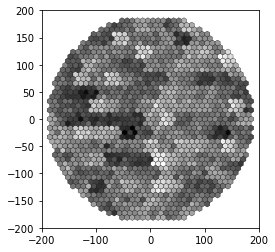

In [10]:
camera(evt.Data[:, 20:200].max(axis=1));

In [11]:
calibrated_file = zfits.FactFitsCalib('20160817_016.fits.fz', '20160817_030.drs.fits.gz')

In [12]:
%%time
for evt in calibrated_file:
    pass

CPU times: user 160 ms, sys: 8 ms, total: 168 ms
Wall time: 164 ms


In [14]:
evt

OrderedDict([('BoardTime',
              array([ -580730610,  -580713508,  -580672801,  -580743586,  -580712641,
                      -580698282,  -580674385,  -580704802,  -580725582,  -580739245,
                     -1086444663, -1086449660, -1086465269, -1086437128, -1086466668,
                     -1086425951, -1086439402, -1086485677, -1086454930, -1086437231,
                      -580672637,  -580712504,  -580774808,  -580730890,  -580655414,
                      -580709135,  -580706876,  -580684979,  -580733692,  -580666493,
                     -2089771161, -2089728679, -2089701834, -2089688627, -2089775212,
                     -2089715998, -2089723508, -2089751270, -2089736958, -2089684509], dtype=int32)),
             ('Data', array([[-1901, -1910, -1907, ..., -1852, -1949, -1874],
                     [-1904, -1917, -1916, ..., -1864, -1937, -1890],
                     [-1884, -1889, -1890, ..., -1882, -1936, -1884],
                     ..., 
                     [-1

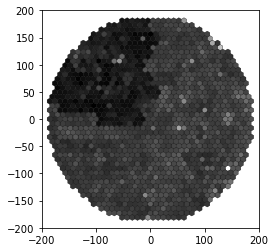

In [13]:
camera(evt['CalibData'][:, 20:200].max(axis=1));